In [1]:
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.0 MB/s eta 0:00:00


# ***Reddit API Authentication***

In [2]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="VOpGfy-fqDmZYrvUtk7F7A",
    client_secret="kFyW-w6Ll2O2ZIV4It-qGIqtv4KkbQ",
    user_agent=user_agent
)

In [3]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

# ***New rising topics***

In [4]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("starbucks").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



“I am in a rush”
1aqkw1x
Even-Commission79
1707910730.0
889
0.99
https://i.redd.it/7pewfhxgfjic1.jpeg
0


# ***Selecting headlines of subreddits on selected topic***

In [5]:
#Get total comment in Subreddit

headlines = set()
for submission in reddit.subreddit("starbucks").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

953


# ***Creating dataset***

In [6]:
#Create a dataframe from the scrapped data
starbucks_df = pd.DataFrame(headlines)
starbucks_df.head()

,0
0,please help!!!! first time taking ice machine ...
1,Are we allowed to ring someone up after close?
2,Meme I made a while back that still holds true
3,Are you guys allowed to turn customers away 15...
4,How should I order this so it’s still good later?


In [7]:
df = starbucks_df.iloc[:, 1:]
starbucks_df.head()

,0
0,please help!!!! first time taking ice machine ...
1,Are we allowed to ring someone up after close?
2,Meme I made a while back that still holds true
3,Are you guys allowed to turn customers away 15...
4,How should I order this so it’s still good later?


In [8]:
starbucks_df.columns

RangeIndex(start=0, stop=1, step=1)

In [9]:
starbucks_df.columns = ['Titles']

In [10]:
starbucks_df.head()

,Titles
0,please help!!!! first time taking ice machine ...
1,Are we allowed to ring someone up after close?
2,Meme I made a while back that still holds true
3,Are you guys allowed to turn customers away 15...
4,How should I order this so it’s still good later?


In [11]:
starbucks_df.Titles.duplicated().sum()

0

# ***Cleaning headlines***

In [12]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :

    return text

#Cleaning the text
starbucks_df["Titles"]= starbucks_df["Titles"].apply(cleanTxt)

#Show the clean text
starbucks_df.head()

,Titles
0,please help!!!! first time taking ice machine ...
1,Are we allowed to ring someone up after close?
2,Meme I made a while back that still holds true
3,Are you guys allowed to turn customers away 15...
4,How should I order this so it’s still good later?


In [13]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
starbucks_df["Titles"]= starbucks_df["Titles"].apply(remove_emoji)

#Show the clean text
starbucks_df.head()


,Titles
0,please help!!!! first time taking ice machine ...
1,Are we allowed to ring someone up after close?
2,Meme I made a while back that still holds true
3,Are you guys allowed to turn customers away 15...
4,How should I order this so it’s still good later?


In [14]:
!pip install textblob

In [15]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# ***Getting polarity and insight***

In [16]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
starbucks_df['Subjectivity'] = starbucks_df['Titles'].apply(getSubjectivity)
starbucks_df['Polarity'] = starbucks_df['Titles'].apply(getPolarity)

#Now display data
starbucks_df.head()

,Titles,Subjectivity,Polarity
0,please help!!!! first time taking ice machine ...,0.333333,0.762939
1,Are we allowed to ring someone up after close?,0.000000,0.000000
2,Meme I made a while back that still holds true,0.325000,0.175000
3,Are you guys allowed to turn customers away 15...,0.000000,0.000000
4,How should I order this so it’s still good later?,0.300000,0.350000


In [17]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

starbucks_df["Insight"] = starbucks_df["Polarity"].apply(getInsight)

starbucks_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,please help!!!! first time taking ice machine ...,0.333333,0.762939,Positive
1,Are we allowed to ring someone up after close?,0.000000,0.000000,Neutral
2,Meme I made a while back that still holds true,0.325000,0.175000,Positive
3,Are you guys allowed to turn customers away 15...,0.000000,0.000000,Neutral
4,How should I order this so it’s still good later?,0.300000,0.350000,Positive
5,i’m late again….,0.600000,-0.300000,Negative
6,Can anyone tell me what this is?,0.000000,0.000000,Neutral
7,What’s the best espresso roast for an iced dir...,0.550000,0.200000,Positive
8,Can Starbucks ever break out of gimmicks/endle...,0.000000,0.000000,Neutral
9,Getting real sick of it (RANT),1.000000,-1.000000,Negative


In [18]:
#Data Visualization

import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# ***Visualizing sentiment score***

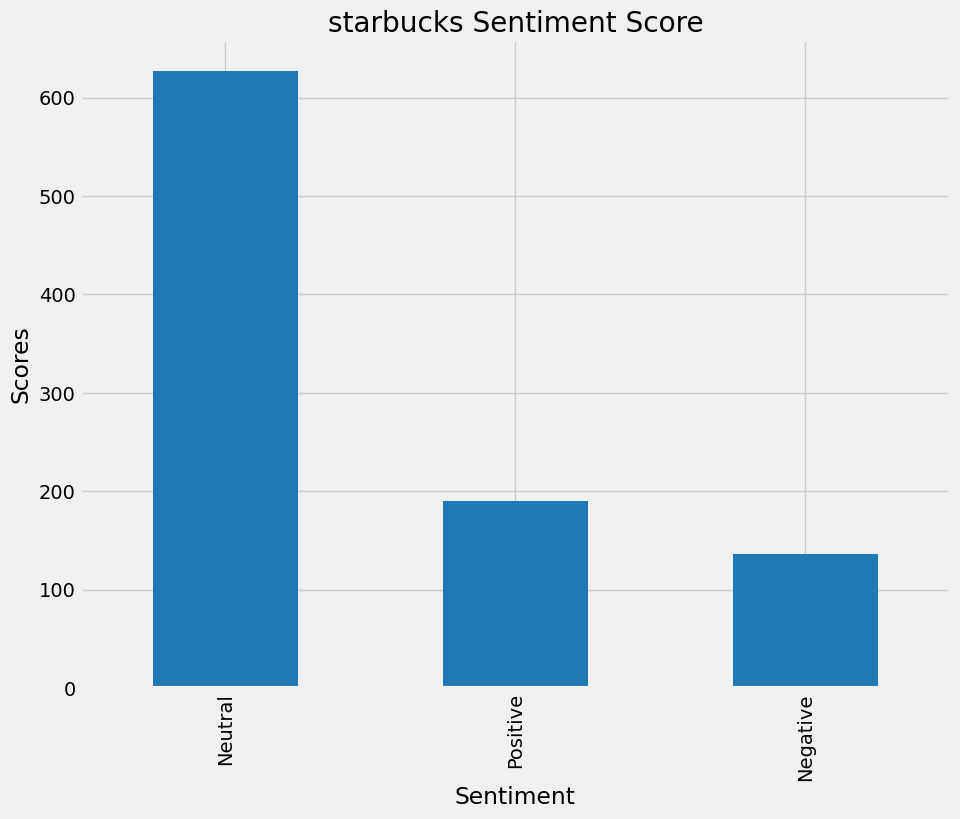

In [20]:
#Plot the values count of sentiment
plt.title("starbucks Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
starbucks_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# ***Word cloud***

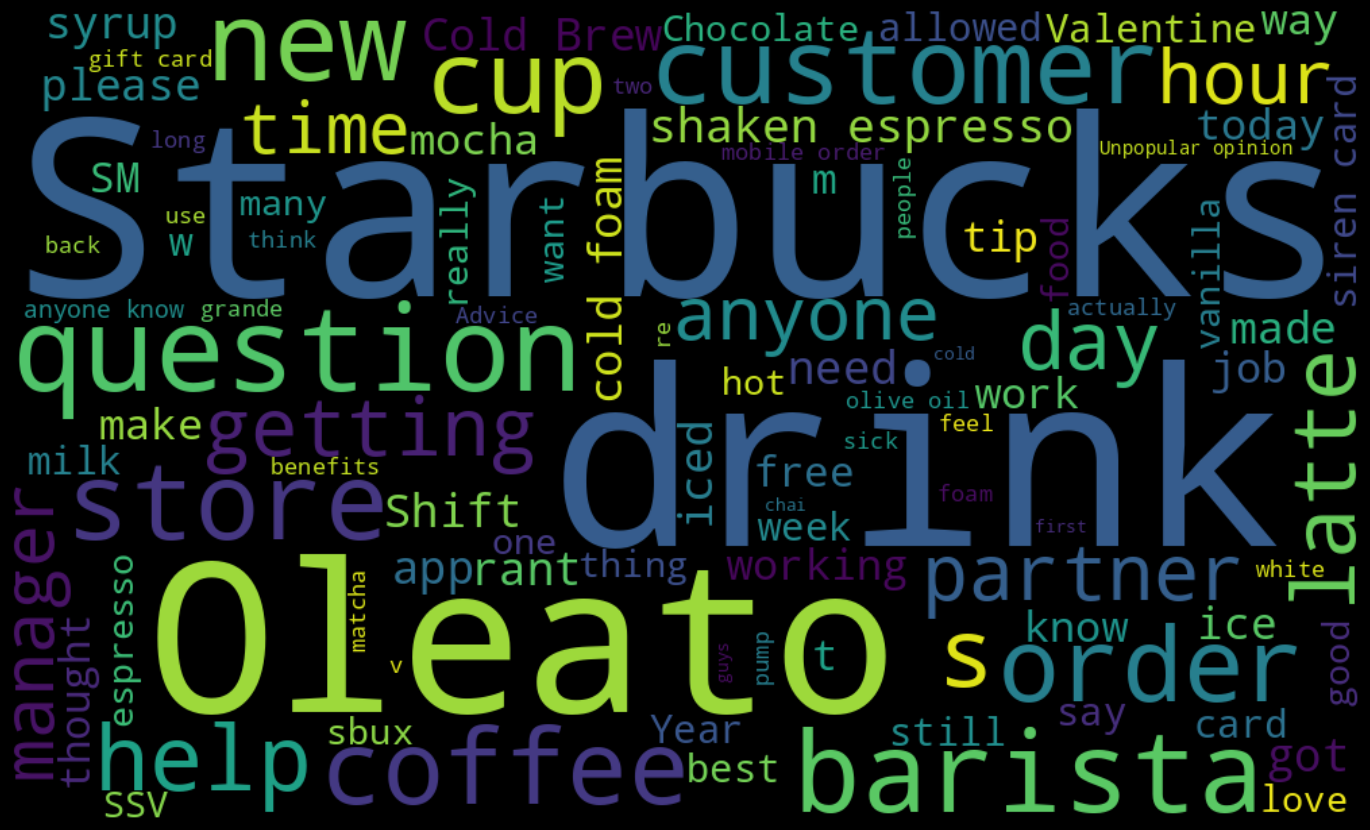

In [21]:
#words cloud

text = ' '.join( [twts for twts in starbucks_df['Titles']] ) #To join all tweet
    # generate word cloud
wordcloud = WordCloud(width=1000, height = 600,

                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");